In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import sys

In [10]:
cpp_centroids = np.array([
[-1.45565,2.25742],
[-3.13238,-1.5436],
[-4.99655,-1.97496],
[-3.54718,-4.12913],
[-3.60029,-4.0108],
[-0.96579,0.325723],
[-3.42705,-4.12869],
]
)

In [11]:
new_cpp_centroids = np.array([
[-1.47138,2.33517],
[-3.13238,-1.5436],
[-4.99655,-1.97496],
[-3.56732,-4.14156],
[-3.59485,-3.99548],
[-0.992335,0.333185],
[-3.4241,-4.1138],
])

In [12]:
X = pd.read_csv("uniform_small_2d_lowstddev/uniform_small_2d_lowstddev_samples.csv", names = ['F1', 'F2']).to_numpy()

cluster_centers = np.array([[-1.08756, 0.480849], [-3.12783, -1.43567], [-4.99813, -1.80588], [-3.5161, -4.12267], [-3.60242, -4.02816], [-0.912942, 0.309218], [-3.4735, -4.13939]])


kmeans_kwargs = {
    "n_clusters": 7,
    "init": cluster_centers, # How centroids will be initialized
    "n_init": 1, # How many times k-means will be run with != starting 
    "verbose": "Ture",
    "tol": 0.0001,
    "algorithm": "lloyd",
}

with open('out.txt', 'w') as f:

    def tracefunc(frame, event, arg, indent=[0]):
        if event == "call":
            indent[0] += 2
            print("-" * indent[0] + "> call function", frame.f_code.co_name)
        elif event == "return":
            print("<" + "-" * indent[0], "exit function", frame.f_code.co_name)
            indent[0] -= 2
        return tracefunc
 
sys.setprofile(tracefunc)

kmeans = KMeans( **kmeans_kwargs)
A = kmeans.fit(X)
kmeans.cluster_centers_

< exit function <module>
< exit function run_code
> call function __get__
> call function get
< exit function get
< exit function __get__
> call function helper
> call function __init__
< exit function __init__
< exit function helper
> call function __enter__
> call function extra_flags
< exit function extra_flags
< exit function __enter__
> call function __call__
< exit function __call__
> call function compare
< exit function compare
> call function __exit__
> call function extra_flags
< exit function extra_flags
< exit function __exit__
> call function run_code
> call function __getattr__
< exit function __getattr__
> call function __call__
--> call function pre_run_code_hook
<-- exit function pre_run_code_hook
< exit function __call__
> call function user_global_ns
< exit function user_global_ns
> call function <module>
--> call function __init__
----> call function __init__
<---- exit function __init__
<-- exit function __init__
< exit function <module>
< exit function run_code
> 

array([[-1.52991264,  2.61445909],
       [-3.13237816, -1.54360335],
       [-4.99655076, -1.97495833],
       [-3.57372571, -4.16326823],
       [-3.58788879, -3.99235979],
       [-1.03253464,  0.39806561],
       [-3.42149692, -4.08752833]])

<---------- exit function send
<-------- exit function schedule
--------> call function __init__
----------> call function __init__
<---------- exit function __init__
<-------- exit function __init__
--------> call function schedule
----------> call function is_alive
------------> call function is_set
<------------ exit function is_set
------------> call function _wait_for_tstate_lock
<------------ exit function _wait_for_tstate_lock
<---------- exit function is_alive
----------> call function _event_pipe
<---------- exit function _event_pipe
----------> call function send
<---------- exit function send
<-------- exit function schedule
--------> call function wait
----------> call function __enter__
<---------- exit function __enter__
----------> call function wait
------------> call function _is_owned
<------------ exit function _is_owned
------------> call function _release_save
<------------ exit function _release_save
------------> call function _acquire_restore
<------------ exit 

In [12]:
kmeans.cluster_centers_ - new_cpp_centroids

array([[-5.85326375e-02,  2.79289085e-01],
       [ 1.83526512e-06, -3.35108368e-06],
       [-7.57177229e-07,  1.67239564e-06],
       [-6.40571487e-03, -2.17082282e-02],
       [ 6.96121449e-03,  3.12020628e-03],
       [-4.01996394e-02,  6.48806099e-02],
       [ 2.60307523e-03,  2.62716668e-02]])

In [6]:
cpp_centroids - new_cpp_centroids

array([[ 0.01573 , -0.07775 ],
       [ 0.      ,  0.      ],
       [ 0.      ,  0.      ],
       [ 0.02014 ,  0.01243 ],
       [-0.00544 , -0.01532 ],
       [ 0.026545, -0.007462],
       [-0.00295 , -0.01489 ]])

In [7]:
centers = pd.read_csv("uniform_small_2d_lowstddev/uniform_small_2d_lowstddev_centers.csv", header = None)
centers

,0,1
0,-0.829780,2.203245
1,-4.998856,-1.976674
2,-3.532441,-4.076614
3,-3.137398,-1.544393
4,-1.032325,0.388167
5,-0.808055,1.852195
6,-2.955478,3.781174


In [8]:
results = kmeans.labels_
results

array([6, 5, 0, ..., 0, 5, 5], dtype=int32)

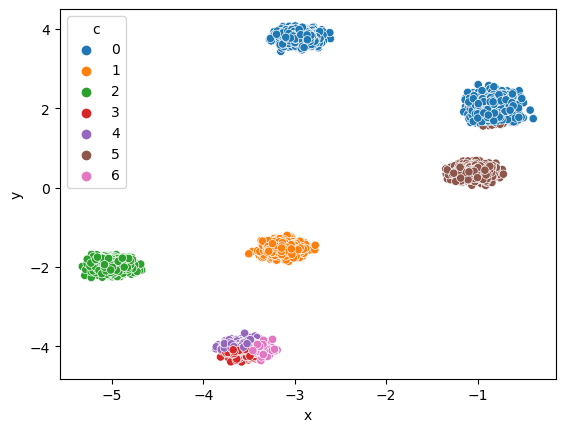

In [9]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], c=results))
sns.scatterplot(x=df["x"], y=df["y"], 
                hue=df["c"], 
                palette=sns.color_palette("tab10", n_colors=7))

plt.show()

In [16]:
cluster_centers = np.array([[-1.08756, 0.480849], [-3.12783, -1.43567], [-4.99813, -1.80588], [-3.5161, -4.12267], [-3.60242, -4.02816], [-0.912942, 0.309218], [-3.4735, -4.13939]])

In [54]:
#center_shift = np.zeros(7, dtype=X.dtype)
center_shift = np.array([1, 1, 1, 1, 1, 1, 1])
center_shift

array([1, 1, 1, 1, 1, 1, 1])

In [55]:
center_shift_tot = (center_shift**2).sum()
center_shift_tot

7

In [56]:
X.max()

1.5627183408390237

In [10]:
np.var(X)

6.025185545419654

In [11]:
variances = np.var(X, axis=0)
variances

array([2.25513811, 6.52248828])

In [8]:
!pip show sklearn

Name: sklearn
Version: 0.0.post1
Summary: deprecated sklearn package, use scikit-learn instead
Home-page: 
Author: 
Author-email: 
License: 
Location: /home/bscuser/anaconda3/lib/python3.9/site-packages
Requires: 
Required-by: 
